In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from umap import UMAP
import sys
sys.path.append('..')
from utils import load_pickle, save_pickle, seed_everything
seed_everything(42)

/home/sagawa/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
target_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_mean.npy")
print(target_embedding.shape)

(1792472, 768)


In [3]:
sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
target_embedding = target_embedding[sample_idx_target]

In [5]:
# umap = UMAP(n_components=2)
# target_embedding_umap = umap.fit_transform(target_embedding)

# save_pickle("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/umap.pkl", umap)
# np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_umap.npy", target_embedding_umap)
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_umap.npy")
print(target_embedding_umap.shape)

(10000, 2)


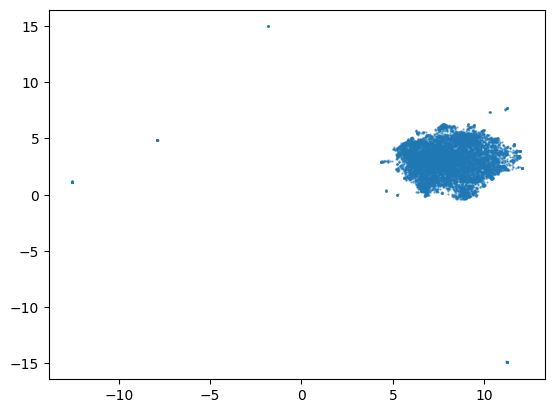

In [6]:
fig, ax = plt.subplots()
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=0.5)

In [7]:
query_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/embedding_mean.npy")
print(query_embedding.shape)

(5004, 768)


In [8]:
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/query_embedding_umap.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/query_embedding_umap.npy")
print(query_embedding_umap.shape)

(5004, 2)


/tmp/ipykernel_7662/1249586914.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_7662/1249586914.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


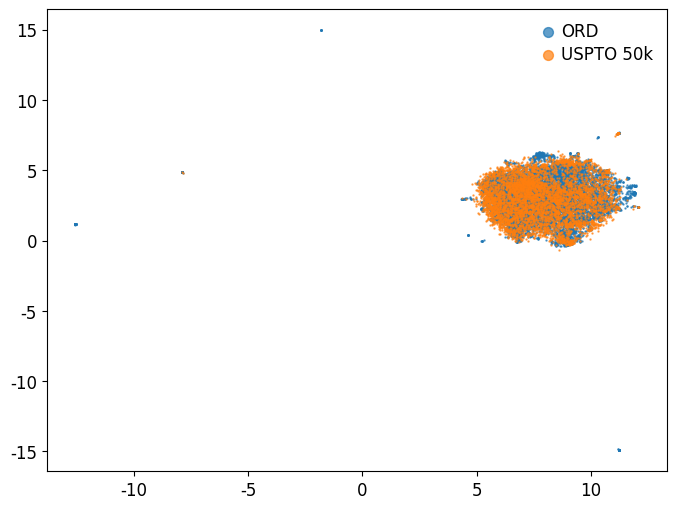

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="USPTO 50k")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

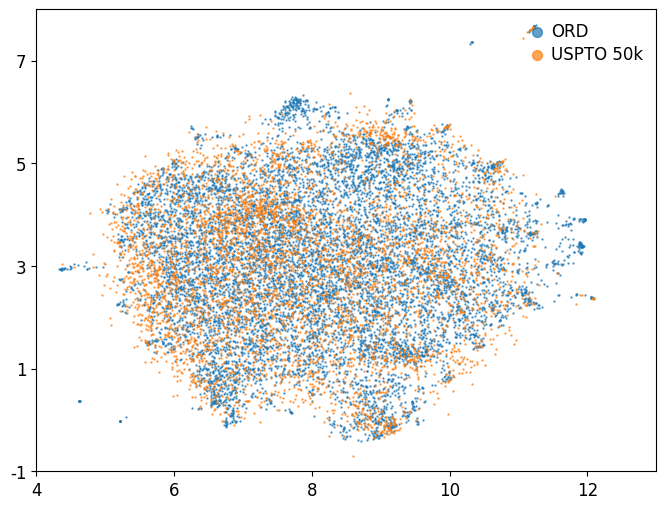

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="USPTO 50k")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [12]:
df_target = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/input_data.csv")
df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
df_query = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/input_data.csv")

# df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
# df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

In [13]:
# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)
    df["logp"] = df["mol"].apply(Descriptors.MolLogP)
    df["hba"] = df["mol"].apply(Descriptors.NumHAcceptors)
    df["hbd"] = df["mol"].apply(Descriptors.NumHDonors)
    df["tpsa"] = df["mol"].apply(Descriptors.TPSA)
    df["rotb"] = df["mol"].apply(Descriptors.NumRotatableBonds)
    df["atoms"] = df["mol"].apply(Descriptors.HeavyAtomCount)
    df["rings"] = df["mol"].apply(Descriptors.RingCount)
    df["qed"] = df["mol"].apply(Descriptors.qed)

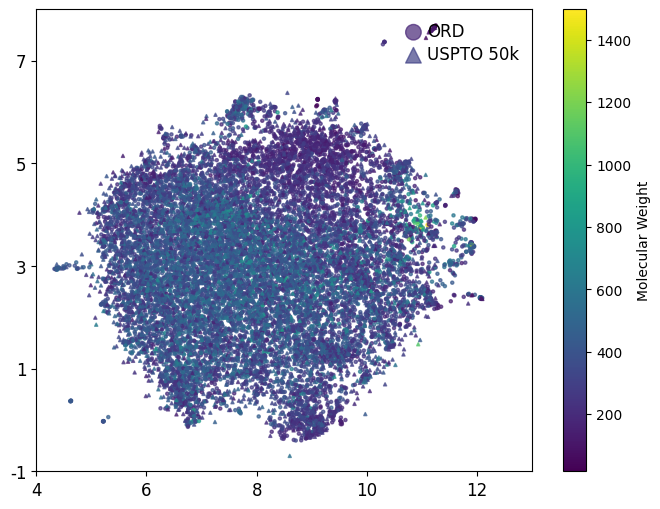

In [21]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["mw"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

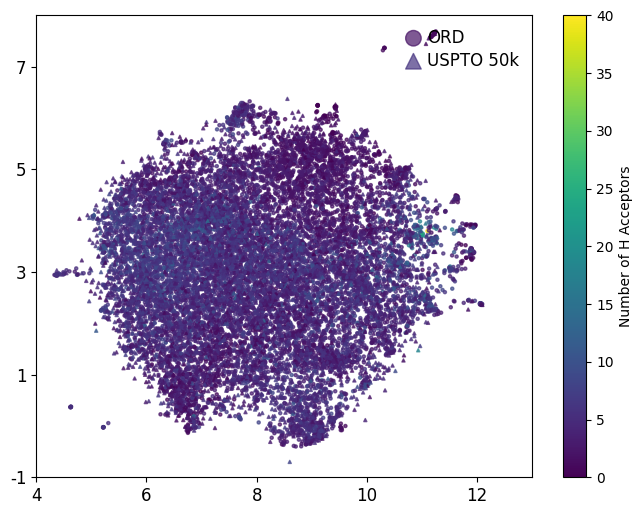

In [22]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hba"].min(), df_query["hba"].min()), max(df_target["hba"].max(), df_query["hba"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["hba"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["hba"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Acceptors")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

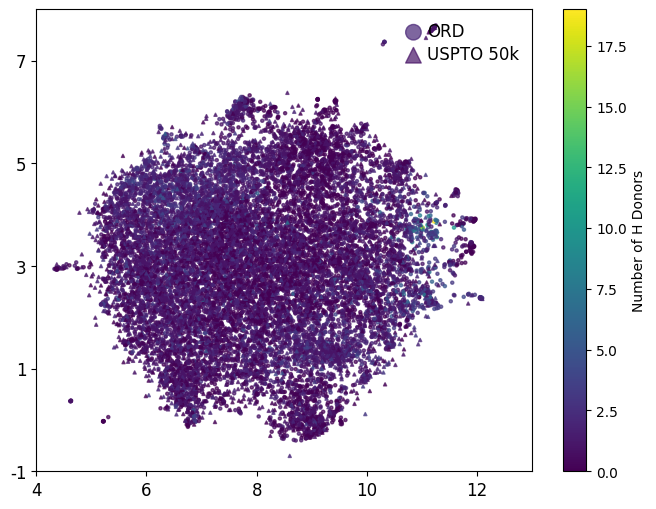

In [23]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hbd"].min(), df_query["hbd"].min()), max(df_target["hbd"].max(), df_query["hbd"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["hbd"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["hbd"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Donors")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

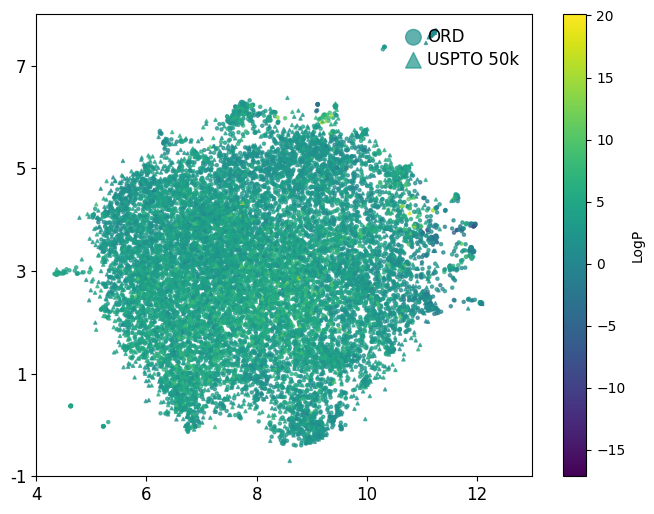

In [27]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["logp"].min(), df_query["logp"].min()), max(df_target["logp"].max(), df_query["logp"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["logp"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["logp"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="LogP")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

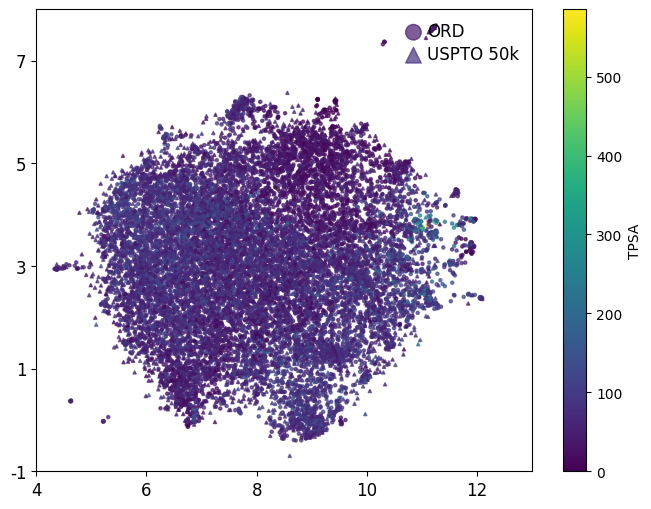

In [24]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["tpsa"].min(), df_query["tpsa"].min()), max(df_target["tpsa"].max(), df_query["tpsa"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["tpsa"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["tpsa"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="TPSA")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

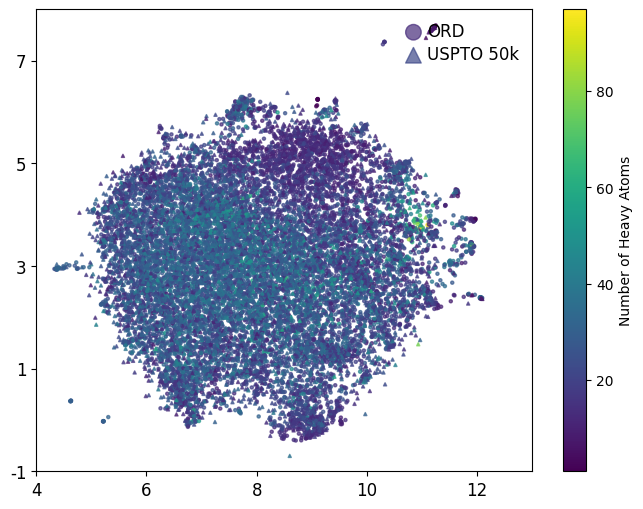

In [25]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["atoms"].min(), df_query["atoms"].min()), max(df_target["atoms"].max(), df_query["atoms"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["atoms"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["atoms"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Heavy Atoms")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

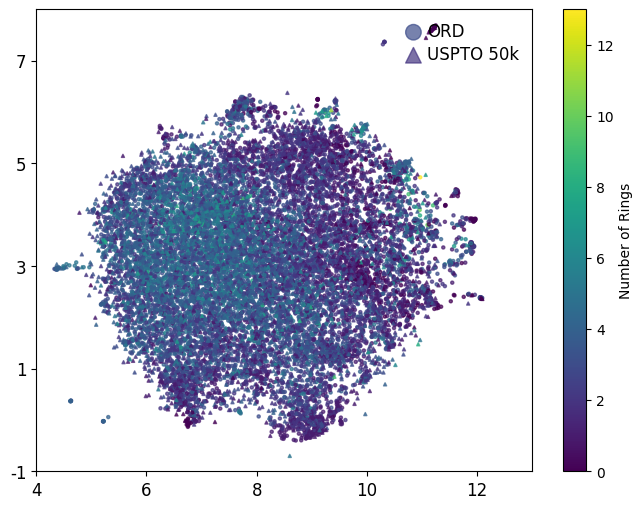

In [26]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["rings"].min(), df_query["rings"].min()), max(df_target["rings"].max(), df_query["rings"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["rings"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["rings"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Rings")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [28]:
from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("sagawa/ReactionT5v2-retrosynthesis")
for df in [df_target, df_query]:
    df["input_len"] = df["input"].apply(lambda x: len(tokenizer(x)["input_ids"]))

/home/sagawa/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


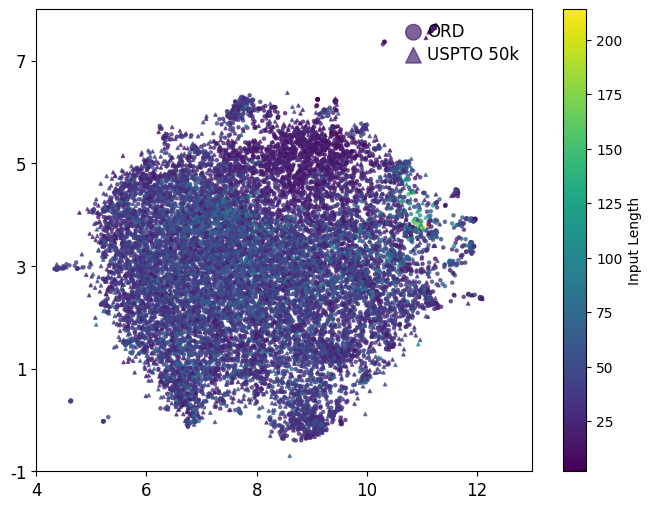

In [29]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["input_len"].min(), df_query["input_len"].min()), max(df_target["input_len"].max(), df_query["input_len"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=5, label="ORD", c=cmap(norm(df_target["input_len"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=5, label="USPTO 50k", c=cmap(norm(df_query["input_len"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Input Length")
ax.set_xticks(range(4, 13, 2))
ax.set_yticks(range(-1, 9, 2))
ax.set_xticklabels(range(4, 13, 2), fontsize=12)
ax.set_yticklabels(range(-1, 9, 2), fontsize=12)
ax.set_xlim(4,13)
ax.set_ylim(-1, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

# visualize distance

In [ ]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/distance.csv")
distance

,REACTANT,PRODUCT,CATALYST,REAGENT,SOLVENT,input,distance
0,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,,,,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,0.669855
1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,,,,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,0.723579
2,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,,,,CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,0.907065
3,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1,,,,O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1,0.791577
4,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...,,,,NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...,0.768288
...,...,...,...,...,...,...,...
4999,Cc1cc([N+](=O)[O-])ccc1O.Nc1cc(Cl)ccn1,Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1,,,,Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1,0.884089
5000,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)OC(C)(C)C)CC3,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3,,,,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3,0.646120
5001,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(=...,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...,,,,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...,0.830466
5002,C=C(C)Cn1nc(C)c(Br)c1-c1ccc(F)cc1.OO,Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br,,,,Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br,0.692978


/tmp/ipykernel_3436725/97392767.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


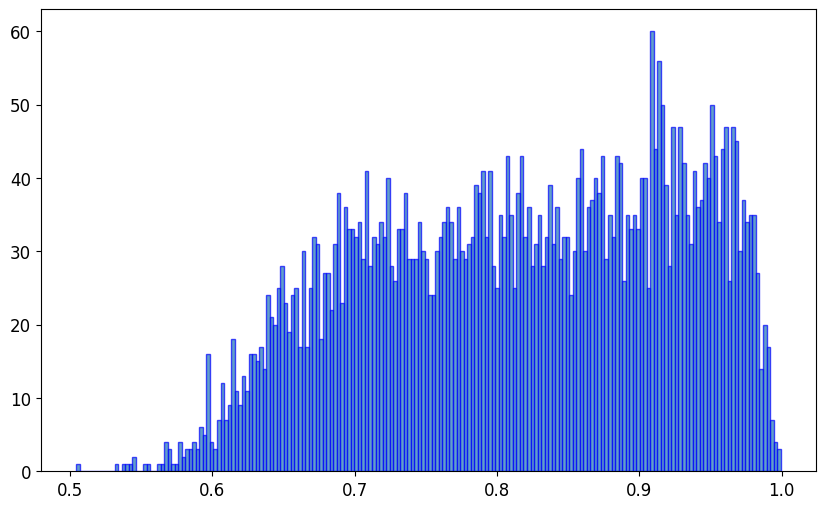

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# visualize distance

In [43]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/distance.csv")
distance

,REACTANT,PRODUCT,CATALYST,REAGENT,SOLVENT,input,distance
0,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,,,,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,0.669855
1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,,,,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,0.723579
2,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,,,,CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,0.907065
3,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1,,,,O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1,0.791577
4,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...,,,,NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...,0.768288
...,...,...,...,...,...,...,...
4999,Cc1cc([N+](=O)[O-])ccc1O.Nc1cc(Cl)ccn1,Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1,,,,Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1,0.884089
5000,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)OC(C)(C)C)CC3,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3,,,,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3,0.646120
5001,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(=...,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...,,,,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...,0.830466
5002,C=C(C)Cn1nc(C)c(Br)c1-c1ccc(F)cc1.OO,Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br,,,,Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br,0.692978


/tmp/ipykernel_3436725/97392767.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


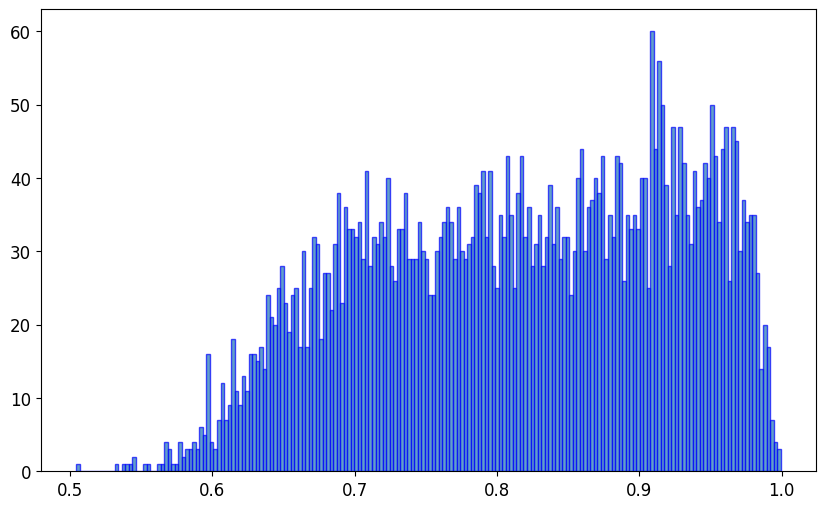

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [45]:
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top1_similar_reactions.csv")))
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top3_similar_reactions.csv")))
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top5_similar_reactions.csv")))


4942
14758
24445


3393